# Group Assignment #2: LA City Racial Census Data Exploration

Author: Kimberly Venegas

Kim and Brian's research question is: how accessible are public parks and bike lanes in low-income communities of color? Kim will conduct a race profile for Los Angeles in this notebook. 

## Importing the libraries

In [1]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

## Importing and Cleaning The Dataset

I will import a dataset that I already uploaded to my JupyterHub space. 

In [2]:
gdf = gpd.read_file('Data/acs2019_5yr_B03002_14000US06037534001.geojson')

I will use head to see the first 5 rows of my dataset to see what I am working with.

In [3]:
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06037,"Los Angeles County, CA",10081570.0,0.0,5193136.0,0.0,2641770.0,1343.0,790252.0,2958.0,...,567.0,2083135.0,21995.0,174263.0,4915.0,103325.0,3658.0,70938.0,2605.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,...,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,...,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3731.0,465.0,2986.0,435.0,198.0,165.0,...,17.0,874.0,477.0,81.0,80.0,48.0,62.0,33.0,51.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2338.0,236.0,1812.0,271.0,87.0,107.0,...,12.0,497.0,231.0,45.0,42.0,11.0,18.0,34.0,39.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


After running head, I can see that this dataset contains the information for the entire county so I need to get rid of it.

I will get rid of it using drop.

In [4]:
gdf = gdf.drop([0])

I want to see if drop worked so I am going to run head again.

In [5]:
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,...,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,...,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3731.0,465.0,2986.0,435.0,198.0,165.0,...,17.0,874.0,477.0,81.0,80.0,48.0,62.0,33.0,51.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2338.0,236.0,1812.0,271.0,87.0,107.0,...,12.0,497.0,231.0,45.0,42.0,11.0,18.0,34.0,39.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,3587.0,363.0,3126.0,359.0,205.0,232.0,...,12.0,45.0,38.0,28.0,32.0,28.0,32.0,0.0,12.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Now I want to narrow down the columns that I want. 

In [6]:
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

I want to redefine gdf so that it only retains the columns that I want. 

In [7]:
gdf = gdf[columns_to_keep]

Now I can rename the columns so that they make more sense. 

In [8]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

I want to see if it all worked correctly so I am running info to see an overview of my dataset.

In [9]:
gdf.info

<bound method DataFrame.info of                    geoid                                   name   Total  \
1     14000US06037101110  Census Tract 1011.10, Los Angeles, CA  4283.0   
2     14000US06037101122  Census Tract 1011.22, Los Angeles, CA  3405.0   
3     14000US06037101210  Census Tract 1012.10, Los Angeles, CA  6347.0   
4     14000US06037101220  Census Tract 1012.20, Los Angeles, CA  3702.0   
5     14000US06037101300     Census Tract 1013, Los Angeles, CA  3884.0   
...                  ...                                    ...     ...   
2342  14000US06037980031  Census Tract 9800.31, Los Angeles, CA  1175.0   
2343  14000US06037980033  Census Tract 9800.33, Los Angeles, CA    16.0   
2344  14000US06037990100     Census Tract 9901, Los Angeles, CA     0.0   
2345  14000US06037990200     Census Tract 9902, Los Angeles, CA     0.0   
2346  14000US06037990300     Census Tract 9903, Los Angeles, CA     0.0   

      Non Hispanic  Non Hispanic White  Non Hispanic Black  \
1    

## Normalizing The Data

I want to create a new column that accounts for all people of color (POC) and then a new column that normalizes it. 

In [10]:
gdf['POC'] =gdf['Total'] - gdf['Non Hispanic White']
gdf['% POC'] = gdf['POC']/gdf['Total']*100

I want to create new columns that normalize some of the other columns.

In [11]:
gdf['% Non Hispanic White'] = gdf['Non Hispanic White']/gdf['Total']*100
gdf['% Non Hispanic Black'] = gdf['Non Hispanic Black']/gdf['Total']*100
gdf['% Hispanic'] = gdf['Hispanic']/gdf['Total']*100

Does it work

In [12]:
gdf.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,POC,% POC,% Non Hispanic White,% Non Hispanic Black,% Hispanic
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",1667.0,38.921317,61.078683,0.443614,27.737567
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",523.0,15.359765,84.640235,2.173275,4.317181
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",3361.0,52.954152,47.045848,3.119584,41.216323
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",1890.0,51.053485,48.946515,2.350081,36.844949
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",758.0,19.515963,80.484037,5.278064,7.646756


## Creating Maps

Let me check to see if I separated the people of color and white people correctly.

Text(0.5, 1.0, 'Percent Non Hispanic White')

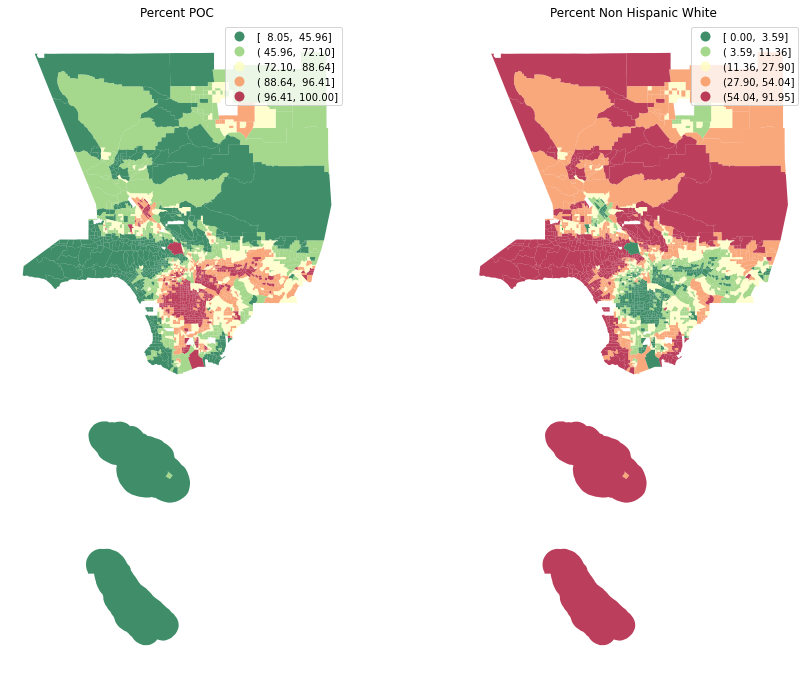

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

ax1, ax2 = axs

gdf.plot(column='% POC', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent POC")

gdf.plot(column='% Non Hispanic White', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Non Hispanic White")

I want to isolate the census tracts with more than 90% people of color.

In [14]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

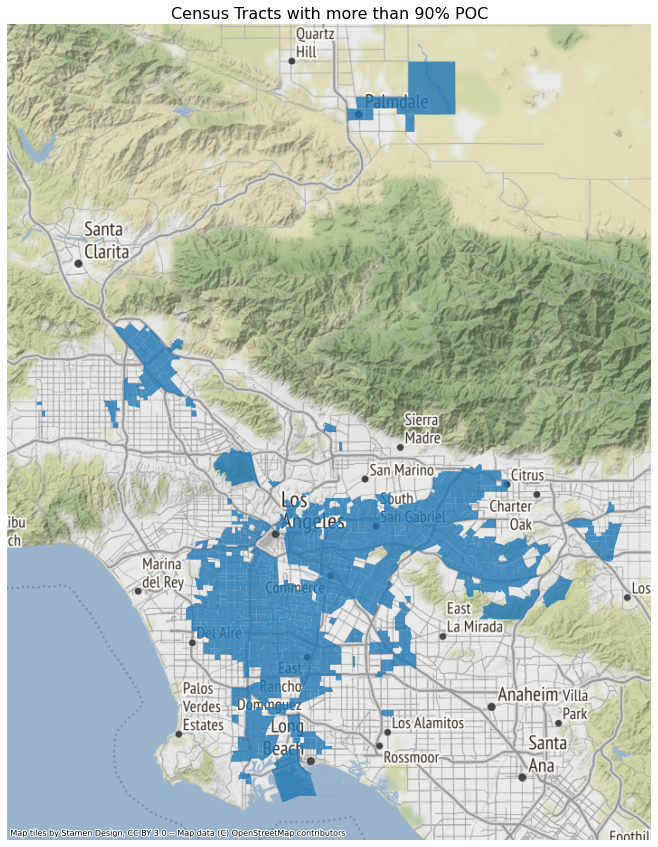

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))

gdf_web_mercator[gdf_web_mercator['% POC'] > 90].plot(ax=ax, alpha=0.8)

ax.axis('off')

ax.set_title('Census Tracts with more than 90% POC',fontsize=16)

ctx.add_basemap(ax)

I want to isolate the census tracts with more than 20% Non Hispanic Black people

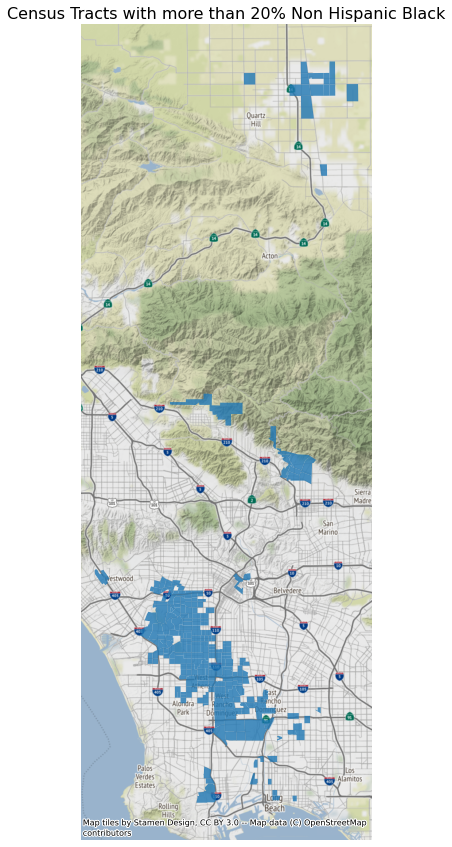

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))

gdf_web_mercator[gdf_web_mercator['% Non Hispanic Black'] > 20].plot(ax=ax, alpha=0.8)

ax.axis('off')

ax.set_title('Census Tracts with more than 20% Non Hispanic Black',fontsize=16)

ctx.add_basemap(ax)

I want to isolate the census tracts with more than 20% Hispanic people

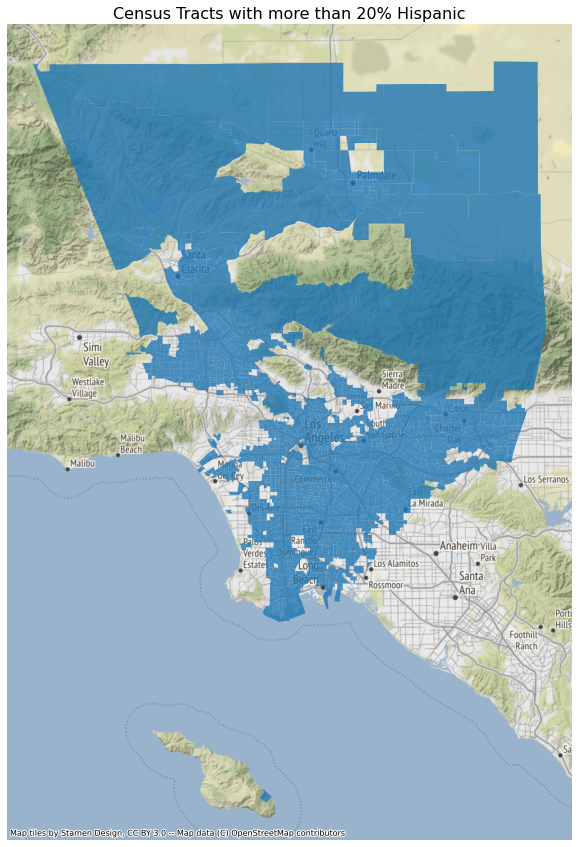

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
 
gdf_web_mercator[gdf_web_mercator['% Hispanic'] > 20].plot(ax=ax, alpha=0.8)

ax.axis('off')

ax.set_title('Census Tracts with more than 20% Hispanic',fontsize=16)

ctx.add_basemap(ax)

## Creating Charts

I want to see the statistics of % POC, % Non Hispanic Black, % Hispanic

In [18]:
gdf['% POC'].describe()

count    2327.000000
mean       73.062502
std        25.180912
min         8.049887
25%        52.932630
50%        83.011583
75%        95.042900
max       100.000000
Name: % POC, dtype: float64

In [19]:
gdf['% Non Hispanic Black'].describe()

count    2327.000000
mean        7.687087
std        11.947525
min         0.000000
25%         1.142318
50%         3.512842
75%         8.262551
max        84.708249
Name: % Non Hispanic Black, dtype: float64

In [20]:
gdf['% Hispanic'].describe()

count    2327.000000
mean       47.966778
std        28.775473
min         0.000000
25%        20.742415
50%        45.845731
75%        73.082618
max       100.000000
Name: % Hispanic, dtype: float64

Apparently there are some census tracks where there are no Hispanic and Non Hispanic Black people

Now I want to create a bar chart of the top 10 census tracts with the largest % of Non Hispanic Black people. First, I am going to sort the % Non Hispanic Black column.

In [21]:
gdf = gdf.sort_values(by=['% Non Hispanic Black'], ascending=False)

Now I am going to trim the dataset so that I only have name and % Non Hispanic Black as columns.

In [22]:
desired_columns = ['name','% Non Hispanic Black']
gdf_trimmed = gdf[desired_columns].copy()
gdf_trimmed

,name,% Non Hispanic Black
1957,"Census Tract 6008.02, Los Angeles, CA",84.708249
765,"Census Tract 2364, Los Angeles, CA",82.157870
1954,"Census Tract 6007.03, Los Angeles, CA",81.772294
1956,"Census Tract 6008.01, Los Angeles, CA",81.119100
2151,"Census Tract 7032, Los Angeles, CA",80.889592
...,...,...
2340,"Census Tract 9800.28, Los Angeles, CA",NaN
2341,"Census Tract 9800.30, Los Angeles, CA",NaN
2344,"Census Tract 9901, Los Angeles, CA",NaN
2345,"Census Tract 9902, Los Angeles, CA",NaN


Now I want only the top 10 census tracts and then I am going to plot it.

In [24]:
gdf_trimmed = gdf_trimmed.head(10)

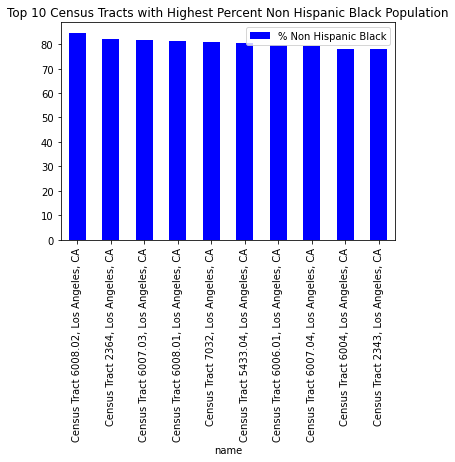

In [25]:
gdf_trimmed.plot.bar(x="name", y="% Non Hispanic Black", color='blue', title = 'Top 10 Census Tracts with Highest Percent Non Hispanic Black Population')

## Takeaways

There are actually several census tracts that have over 90% people of color. However, the only census tracts like that near a beach are in Long Beach. There is a large Hispanic population spread out over LA. In contrast, there are far fewer  Non Hispanic Black people and the census tracts with the largest percentage of Non Hispanic Black people are mainly in South LA, Inglewood, and Compton. It will be interesting to see where parks and bike lanes are located compared to the census tracts with a high percentage of Hispanic people and Non Hispanic Black people.